# ANN-Classification-on-Organic-Compounds

The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. The task was to classify these compounds accordingly. I used an Artificial Neural Network (Multi-Layer Perceptron) built using Keras to do the classification task. 

GitHub Repository: https://github.com/skhiearth/ANN-Classification-on-Organic-Compounds

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('musk_csv.csv')
dataset.head()

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/skhiearth/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Initialising the ANN
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=(166,),
                          activation=tf.nn.tanh),    
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Fitting the ANN to the Training set
history = model.fit(X, y, validation_split = 0.2, epochs = 10)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 192us/sample - loss: 0.4539 - accuracy: 0.8376 - val_loss: 0.2125 - val_accuracy: 0.9894
Epoch 2/10
5278/5278 [==============================] - 0s 52us/sample - loss: 0.2727 - accuracy: 0.9193 - val_loss: 0.1165 - val_accuracy: 0.9939
Epoch 3/10
5278/5278 [==============================] - 0s 51us/sample - loss: 0.2118 - accuracy: 0.9341 - val_loss: 0.0861 - val_accuracy: 0.9962
Epoch 4/10
5278/5278 [==============================] - 0s 51us/sample - loss: 0.1772 - accuracy: 0.9420 - val_loss: 0.0667 - val_accuracy: 0.9924
Epoch 5/10
5278/5278 [==============================] - 0s 50us/sample - loss: 0.1542 - accuracy: 0.9475 - val_loss: 0.0575 - val_accuracy: 0.9932
Epoch 6/10
5278/5278 [==============================] - 0s 50us/sample - loss: 0.1331 - accuracy: 0.9538 - val_loss: 0.0501 - val_accuracy: 0.9902
Epoch 7/10
5278/5278 [==============================] - 0s 53us/sampl

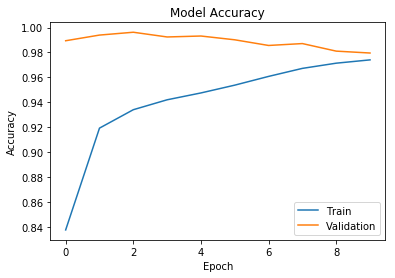

In [6]:
# Model Accuracy Visualisation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

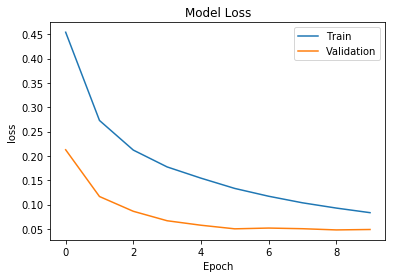

In [7]:
# Model Loss Visualisation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
# Exporting model to .h5
model.save("ann.h5")
print("Saved model to disk!")

Saved model to disk!


In [9]:
# Get Validation Accuracy, Validation Loss
print(history.history['val_accuracy'][-1] * 100)
print(history.history['val_loss'][-1])

97.95454740524292
0.04870130005433704


In [10]:
# Predicting the Test set results
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
recall = (cm[0,0]/(cm[0,0] + cm[1,0]))
precision = (cm[0,0]/(cm[0,0] + cm[0,1]))
f1_score = 2*((precision*recall)/(precision+recall))

metrics = pd.DataFrame({'Recall': [recall], 'Precision': [precision], 'F1-Score': [f1_score]})
metrics

,F1-Score,Precision,Recall
0,0.988424,0.991071,0.98579
